## Project 10 - Introduction to Natural Language Processing - Twitter US Airline Sentiment - (06/21/2023)

## Desciption

**Background and Context**:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

**Description**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

**Dataset**

The dataset has the following columns:

* tweet_id                                                           
* airline_sentiment                                               
* airline_sentiment_confidence                               
* negativereason                                                   
* negativereason_confidence                                    
* airline                                                                    
* airline_sentiment_gold                                              
* name     
* negativereason_gold 
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location 
* user_timezone

## Importing Libraries

In [1]:
import re
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit
import matplotlib.pyplot as plt 
import tensorflow as tf
import seaborn as sns


from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize 

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
from wordcloud import WordCloud,STOPWORDS

from matplotlib import pyplot

from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  #regularization method to prevent the overfitting

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

### Reading the dataset

In [2]:
# Loading data into pandas dataframe
data = pd.read_csv("C:/Users/OneDrive/Desktop/Python/10_introduction_to_natural_language_processing/project/Tweets.csv")

### Overview of the dataset

**view the first (5), last (5) and (10) random rows of the dataset**

In [3]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
np.random.seed(1)
data.sample(n=10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
8515,568198336651649027,positive,1.0000,NaN,NaN,Delta,NaN,GenuineJack,NaN,0,@JetBlue I'll pass along the advice. You guys ...,NaN,2015-02-18 16:00:14 -0800,Massachusetts,Central Time (US & Canada)
3439,568438094652956673,negative,0.7036,Lost Luggage,0.7036,United,NaN,vina_love,NaN,0,@united I sent you a dm with my file reference...,NaN,2015-02-19 07:52:57 -0800,ny,Quito
6439,567858373527470080,positive,1.0000,NaN,NaN,Southwest,NaN,Capt_Smirk,NaN,0,@SouthwestAir Black History Commercial is real...,NaN,2015-02-17 17:29:21 -0800,La Florida,Eastern Time (US & Canada)
5112,569336871853170688,negative,1.0000,Late Flight,1.0000,Southwest,NaN,scoobydoo9749,NaN,0,@SouthwestAir why am I still in Baltimore?! @d...,"[39.1848041, -76.6787131]",2015-02-21 19:24:22 -0800,"Tallahassee, FL",America/Chicago
5645,568839199773732864,positive,0.6832,NaN,NaN,Southwest,NaN,laurafall,NaN,0,@SouthwestAir SEA to DEN. South Sound Volleyba...,NaN,2015-02-20 10:26:48 -0800,NaN,Pacific Time (US & Canada)
1380,569748884164988929,negative,1.0000,Flight Attendant Complaints,0.6818,United,NaN,JacquieMae08,NaN,1,@united One of your workers refused to give me...,NaN,2015-02-22 22:41:34 -0800,SD || CA,Arizona
12674,570066226233417728,negative,1.0000,Bad Flight,0.6966,American,NaN,lczand,NaN,0,@AmericanAir seats that were assigned are inap...,NaN,2015-02-23 19:42:34 -0800,SE USA,Central Time (US & Canada)
13475,569853969469734912,negative,1.0000,Customer Service Issue,0.3642,American,NaN,Davitossss,NaN,0,@AmericanAir now you change my gate and don't ...,NaN,2015-02-23 05:39:08 -0800,NaN,NaN
9630,569771270839013376,negative,1.0000,Late Flight,1.0000,US Airways,NaN,jakenemmasmom,NaN,0,@USAirways What a mess caused by the computer ...,NaN,2015-02-23 00:10:31 -0800,NaN,NaN
3745,568157451729526784,negative,1.0000,Customer Service Issue,0.6803,United,NaN,HeHaithMe,NaN,1,"@united How come you are the ONLY airline, of ...",NaN,2015-02-18 13:17:47 -0800,Born/Raised in 314/Home is 317,Eastern Time (US & Canada)


In [5]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [6]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the data set.")

There are 14640 rows and 15 columns in the data set.


* Some of the columns in the dataset seems irrelevant for building natural language processing models. They can be dropped after futher analysis

**Missing Values**

In [7]:
data.isnull().sum().sort_values(ascending=False)

negativereason_gold             14608
airline_sentiment_gold          14600
tweet_coord                     13621
negativereason                   5462
user_timezone                    4820
tweet_location                   4733
negativereason_confidence        4118
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_created                       0
dtype: int64

In [8]:
# let's check for missing values in the data
print(round(data.isnull().sum() / data.isnull().count() * 100, 2).sort_values().to_string())

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
airline                          0.00
name                             0.00
retweet_count                    0.00
text                             0.00
tweet_created                    0.00
negativereason_confidence       28.13
tweet_location                  32.33
user_timezone                   32.92
negativereason                  37.31
tweet_coord                     93.04
airline_sentiment_gold          99.73
negativereason_gold             99.78


The following columns has > 90% of missing values 
* negativereason_gold
* airline_sentiment_gold          
* tweet_coord                     


**Duplicated Values**

In [9]:
data.duplicated().sum()

36

In [10]:
data[data.duplicated()].count()

tweet_id                        36
airline_sentiment               36
airline_sentiment_confidence    36
negativereason                  19
negativereason_confidence       19
airline                         36
airline_sentiment_gold           0
name                            36
negativereason_gold              0
retweet_count                   36
text                            36
tweet_coord                      4
tweet_created                   36
tweet_location                  26
user_timezone                   30
dtype: int64

* There are 36 duplicated rows. So deleting the duplicated rows. 

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data[data.duplicated()].count()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
name                            0
negativereason_gold             0
retweet_count                   0
text                            0
tweet_coord                     0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

**Unique values**

In [13]:
# checking the number of unique values in each column
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [14]:
# checking datatypes and number of non-null values for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14604 non-null  int64  
 1   airline_sentiment             14604 non-null  object 
 2   airline_sentiment_confidence  14604 non-null  float64
 3   negativereason                9159 non-null   object 
 4   negativereason_confidence     10503 non-null  float64
 5   airline                       14604 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14604 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14604 non-null  int64  
 10  text                          14604 non-null  object 
 11  tweet_coord                   1015 non-null   object 
 12  tweet_created                 14604 non-null  object 
 13  t

In [15]:
# Let's look at the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14604.0,5.692157e+17,7.782567e+14,5.675883e+17,5.685581e+17,5.694728e+17,5.698885e+17,5.703106e+17
airline_sentiment_confidence,14604.0,8.999228e-01,1.629550e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10503.0,6.376440e-01,3.303799e-01,0.000000e+00,3.605000e-01,6.705000e-01,1.000000e+00,1.000000e+00
retweet_count,14604.0,8.278554e-02,7.466473e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [16]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()

for col in num_cols:
    print(f"Category {col}")
    print(data[[col, "airline"]].sort_values(by=col, ascending=False))
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

Category tweet_id
                tweet_id     airline
8966  570310600460525568  US Airways
8967  570310144459972608  US Airways
6746  570309345281486848       Delta
8968  570309340952993796  US Airways
6747  570309308937842688       Delta
...                  ...         ...
6745  567594449874587648   Southwest
4324  567592368451248130      United
4325  567591480085463040      United
8964  567590027375702016       Delta
8965  567588278875213824       Delta

[14604 rows x 2 columns]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Category airline_sentiment_confidence
      airline_sentiment_confidence         airline
0                           1.0000  Virgin America
9301                        1.0000      US Airways
9287                        1.0000      US Airways
9288                        1.0000      US Airways
9290                        1.0000      US Airways
...                            ...             ...
2401                        0.3366          United
7909    

**Unique Airlines**

In [17]:
data['airline'].value_counts(dropna=False)

United            3822
US Airways        2913
American          2723
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [18]:
data['airline'].value_counts(dropna=False, normalize = True)*100

United            26.170912
US Airways        19.946590
American          18.645577
Southwest         16.570803
Delta             15.215010
Virgin America     3.451109
Name: airline, dtype: float64

**Inferences**

* United Airlines has the highest percentage of occurrences, accounting for 26.11% of the data.
* US Airways and American Airlines follow closely, with approximately 19.90% and 18.85% respectively.
* Southwest Airlines and Delta Airlines have similar percentages, with Southwest at 16.53% and Delta at 15.18%.
* Virgin America has the lowest percentage of occurrences among the listed airlines, with only 3.44% of the data.

**Unique Sentiment**

In [19]:
data['airline_sentiment'].value_counts(dropna=False)

negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64

In [20]:
data['airline_sentiment'].value_counts(dropna=False, normalize = True, ascending = False)*100

negative    62.715694
neutral     21.165434
positive    16.118872
Name: airline_sentiment, dtype: float64

**Inferences**

* The majority of sentiments expressed in the dataset are negative, accounting for 62.69% of the data.
* Neutral sentiments make up approximately 21.17% of the dataset.
* Positive sentiments are the least frequent, representing 16.14% of the data.

**Sentiment by Airline**

In [21]:
data.groupby(['airline'])['airline_sentiment'].value_counts(dropna=False, ascending = False)

airline         airline_sentiment
American        negative             1941
                neutral               455
                positive              327
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

In [22]:
data.groupby(['airline'])['airline_sentiment'].value_counts(dropna=False, normalize = True, ascending = False)*100

airline         airline_sentiment
American        negative             71.281675
                neutral              16.709512
                positive             12.008814
Delta           negative             42.979298
                neutral              32.538254
                positive             24.482448
Southwest       negative             49.008264
                neutral              27.438017
                positive             23.553719
US Airways      negative             77.686234
                neutral              13.079300
                positive              9.234466
United          negative             68.890633
                neutral              18.236525
                positive             12.872841
Virgin America  negative             35.912698
                neutral              33.928571
                positive             30.158730
Name: airline_sentiment, dtype: float64

**Inferences**

American Airlines:
* The majority of sentiments expressed towards American Airlines are negative, accounting for approximately 71.04% of the sentiments.
* Neutral sentiments make up about 16.78% of the sentiments, while positive sentiments represent 12.18%.

Delta Airlines:
* Negative sentiments towards Delta Airlines account for approximately 42.98% of the sentiments.
* Neutral sentiments make up about 32.54% of the sentiments, while positive sentiments represent 24.48%.

Southwest Airlines:
* Negative sentiments towards Southwest Airlines account for approximately 49.01% of the sentiments.
* Neutral sentiments make up about 27.44% of the sentiments, while positive sentiments represent 23.55%.

US Airways:
* The majority of sentiments expressed towards US Airways are negative, accounting for approximately 77.69% of the sentiments.
* Neutral sentiments make up about 13.08% of the sentiments, while positive sentiments represent 9.23%.

United Airlines:
* Negative sentiments towards United Airlines account for approximately 68.89% of the sentiments.
* Neutral sentiments make up about 18.24% of the sentiments, while positive sentiments represent 12.87%.

Virgin America:
* Negative sentiments towards Virgin America account for approximately 35.91% of the sentiments.
* Neutral sentiments make up about 33.93% of the sentiments, while positive sentiments represent 30.16%.

**Negative Sentiment vs location**

In [23]:
data[data['airline_sentiment'] == 'negative']['tweet_location'].value_counts(dropna=False, ascending=False)

NaN                            3135
Washington, DC                  109
Boston, MA                      103
New York, NY                     93
New York                         86
                               ... 
Henderson,NV                      1
St Louis, MO                      1
Somerville, MA                    1
43.012983,-78.724003              1
Milwaukee County, Wisconsin       1
Name: tweet_location, Length: 1988, dtype: int64

**Inferences**

* The majority of negative sentiment tweets do not have a specified location (NaN), accounting for 3142 occurrences. This suggests that a significant number of users did not provide their location when expressing negative sentiments.

* Among the specified locations for negative sentiment tweets, the top locations mentioned are:
** Washington, DC with 111 occurrences.
** Boston, MA with 103 occurrences.
** New York, NY with 93 occurrences.
** New York (without specifying the state) with 86 occurrences.

* It's important to note that the dataset contains a variety of locations, with a total of 1988 unique values. However, the frequency of specific locations drops significantly after the top few mentioned above.

In [24]:
data['tweet_location'] = data['tweet_location'].replace('43.012983,-78.724003', 'Buffalo, NY')

In [25]:
data[data['airline_sentiment'] == 'negative']['tweet_location'].value_counts(dropna=False, ascending=False)

NaN                            3135
Washington, DC                  109
Boston, MA                      103
New York, NY                     93
New York                         86
                               ... 
Iowa State University             1
Henderson,NV                      1
St Louis, MO                      1
Somerville, MA                    1
Milwaukee County, Wisconsin       1
Name: tweet_location, Length: 1987, dtype: int64

In [26]:
data['retweet_count'].value_counts(dropna=False)

0     13838
1       639
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
28        1
9         1
18        1
11        1
31        1
15        1
44        1
Name: retweet_count, dtype: int64

**Inferences**

* The majority of tweets in the dataset have no retweets, with a count of 0. This suggests that a significant portion of the tweets did not receive any retweets.
* Among the tweets that did receive retweets, the count is relatively low. The counts range from 1 to 32, with the most common counts being 1, 2, 3, and 4.
* The distribution of retweet counts shows a steep decline as the count increases. The number of tweets with counts higher than 4 decreases significantly, indicating that the majority of tweets in the dataset received a low number of retweets.
* It's important to note that the dataset does not specify whether the retweets were performed by other users or by the original author of the tweet. The retweet count represents the number of retweets a tweet has received but does not provide information about the reach or engagement of those retweets.

In [27]:
data.groupby('airline')['negativereason'].value_counts().unstack(fill_value=0)

negativereason,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines
airline,,,,,,,,,,
American,87,198,242,762,12,86,130,244,146,34
Delta,64,186,51,199,11,60,44,269,57,14
Southwest,90,159,162,391,14,38,61,152,90,29
US Airways,104,246,189,811,11,123,122,453,154,50
United,216,379,181,681,22,168,144,525,269,48
Virgin America,19,22,18,60,4,5,28,17,5,3


**Inferences**

American Airlines:
* The most common negative reason is "Customer Service Issue" with 762 occurrences.
* Other frequent negative reasons include "Cancelled Flight" (242), "Late Flight" (244), and "Lost Luggage" (146).

Delta Airlines:
* The most common negative reason is "Customer Service Issue" with 199 occurrences.
* Other frequent negative reasons include "Late Flight" (269) and "Cancelled Flight" (51).

Southwest Airlines:
* The most common negative reason is "Customer Service Issue" with 391 occurrences.
* Other frequent negative reasons include "Cancelled Flight" (162) and "Late Flight" (152).

US Airways:
* The most common negative reason is "Customer Service Issue" with 811 occurrences.
* Other frequent negative reasons include "Cancelled Flight" (189), "Late Flight" (453), and "Lost Luggage" (154).

United Airlines:
* The most common negative reason is "Customer Service Issue" with 681 occurrences.
* Other frequent negative reasons include "Cancelled Flight" (181), "Late Flight" (525), and "Lost Luggage" (269).

Virgin America:
* The most common negative reason is "Customer Service Issue" with 60 occurrences.
* Other frequent negative reasons include "Cancelled Flight" (18) and "Late Flight" (17).

## Feature Engineering

removing 

tweet_id
tweet_coord
airline_sentiment_gold
name
negativereason_gold

columns that are potentially unnecessary for the specific analysis or modeling task. It can help reduce the dimensionality of the dataset and focus on the relevant features, improving efficiency and performance.Dropped columns are not required for any subsequent analysis or modeling steps.

In [28]:
data.drop(["tweet_id", "tweet_coord", "airline_sentiment_gold","name","negativereason_gold"], axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

In [29]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [30]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

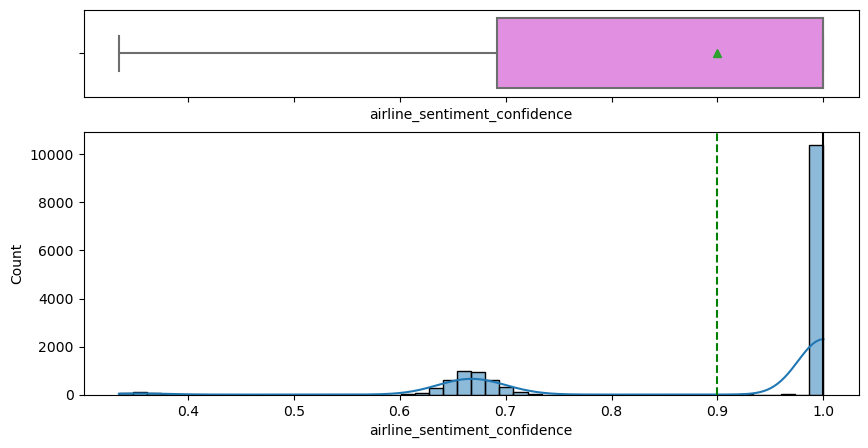

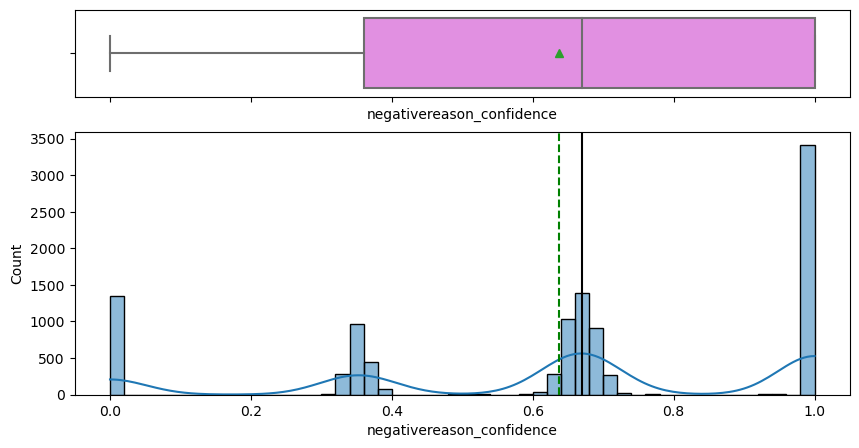

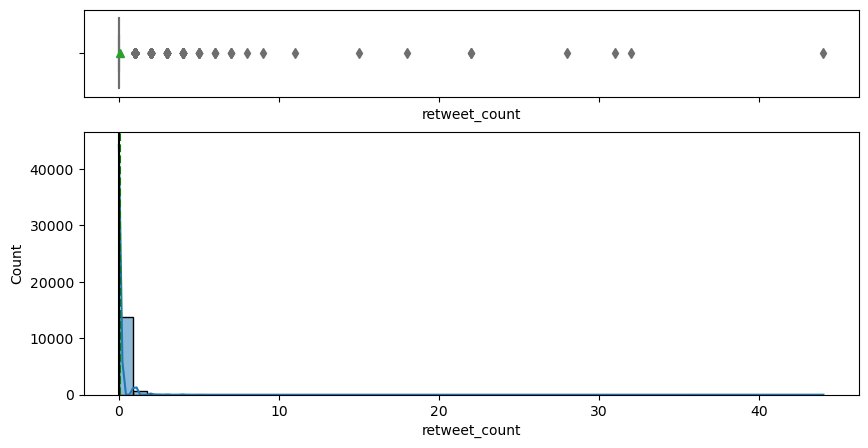

In [31]:
# selecting numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(data, item, bins=50, kde=True, figsize=(10, 5))

### Distribution of all tweets among each airline

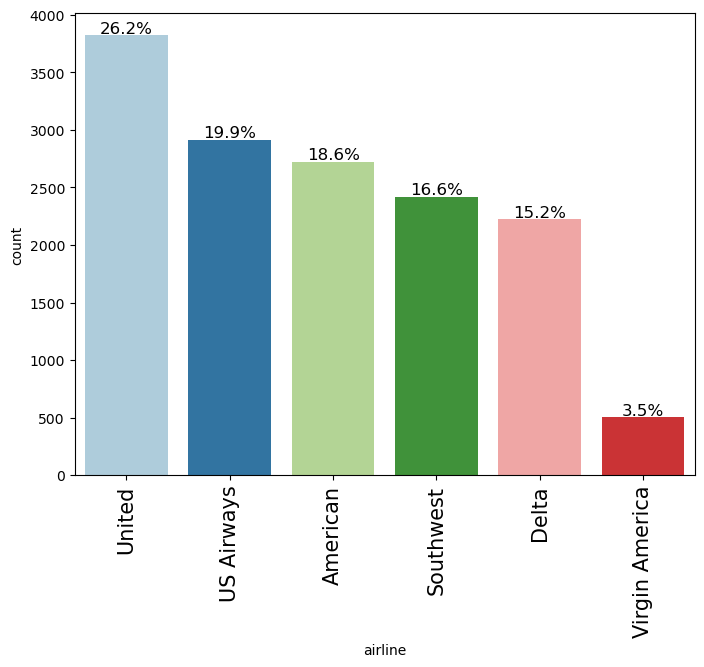

In [32]:
labeled_barplot(data, "airline", perc=True)

<AxesSubplot:>

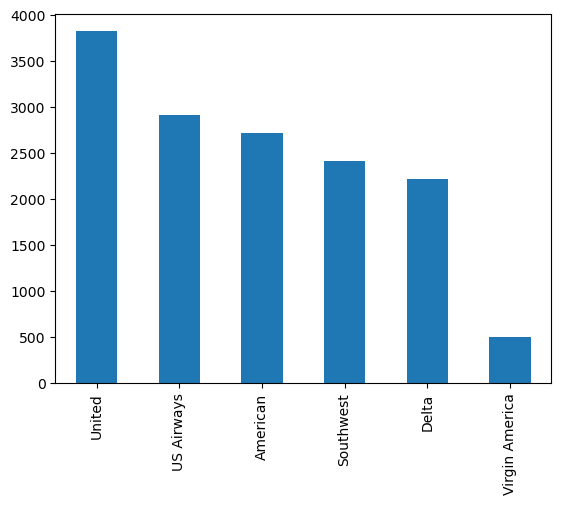

In [33]:
#visual representation of instances per Exited
data.airline.value_counts().plot.bar()

### Distribution of sentiment across all the tweets

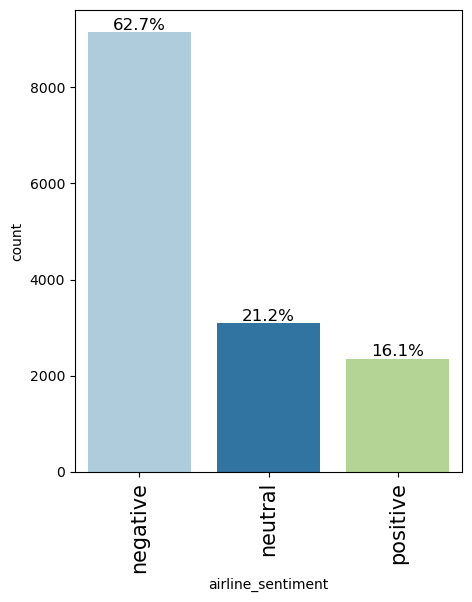

In [34]:
labeled_barplot(data, "airline_sentiment", perc=True)

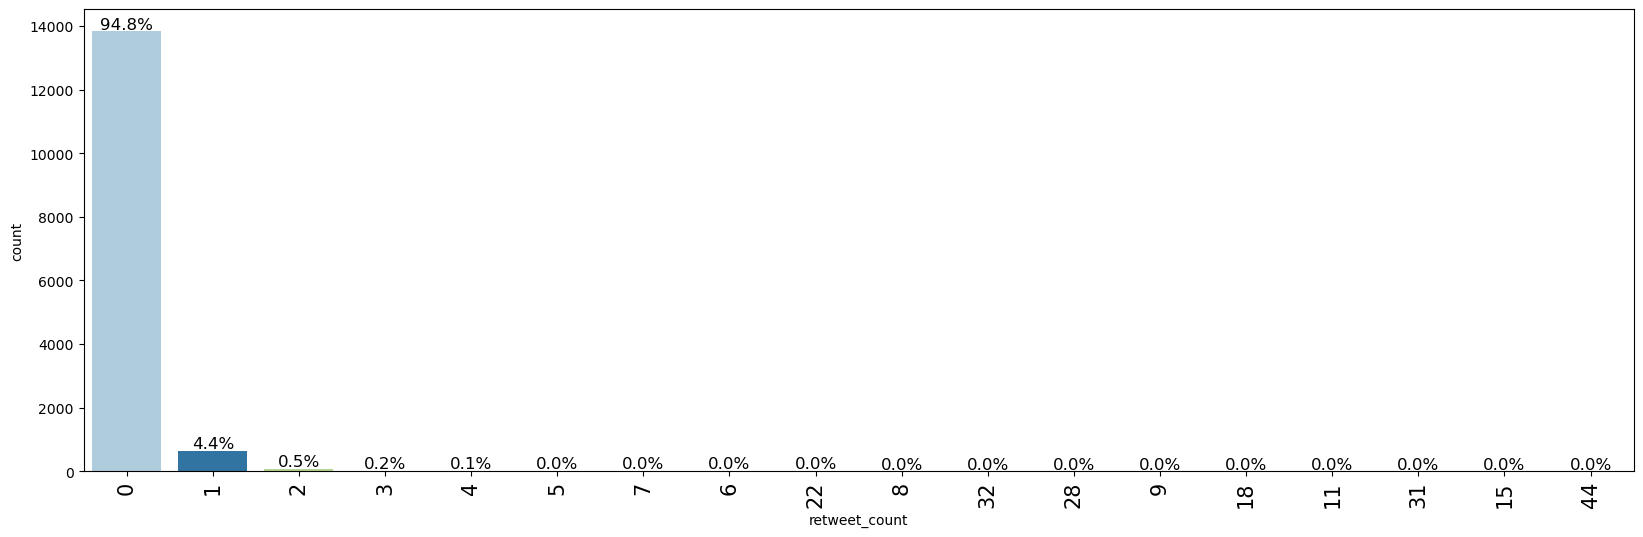

In [35]:
labeled_barplot(data, "retweet_count", perc=True)

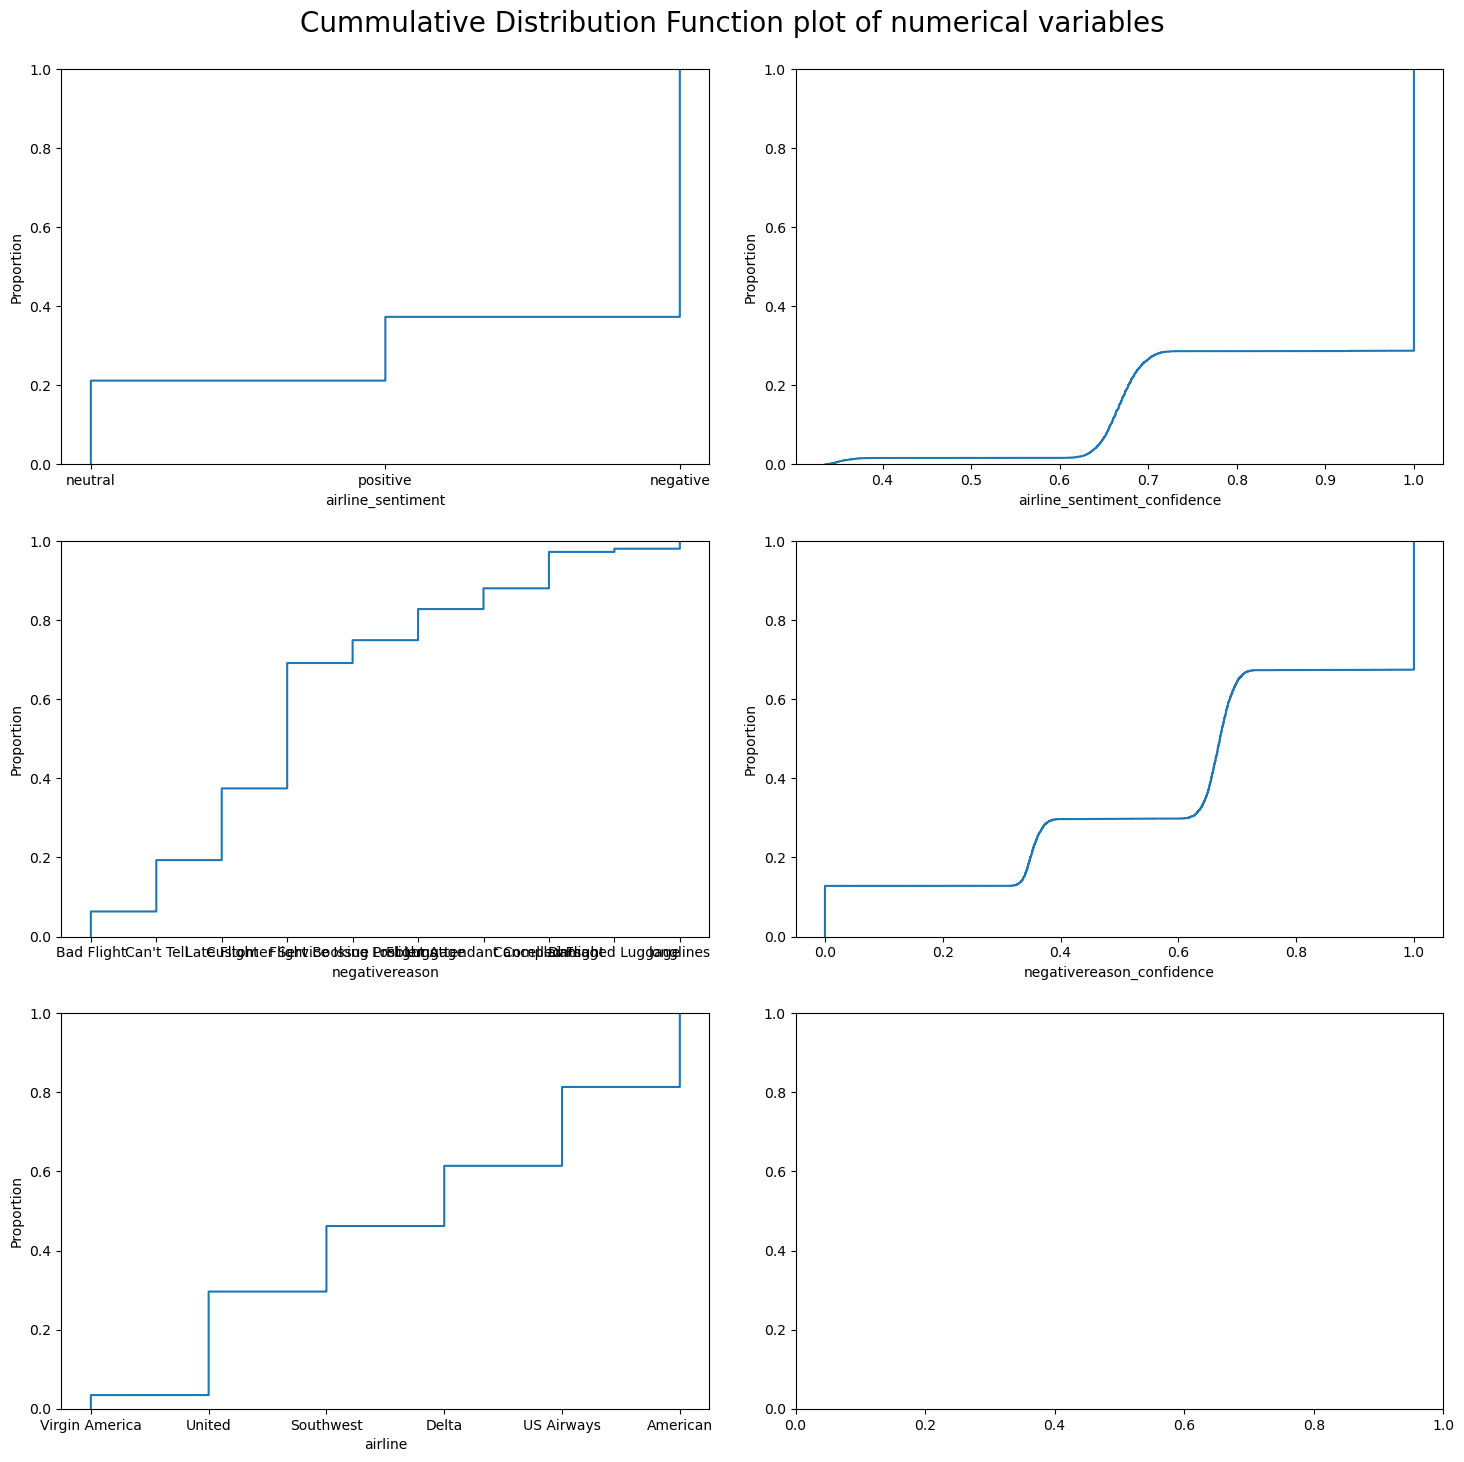

In [36]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle(
    "Cummulative Distribution Function plot of numerical variables", fontsize=20
)

counter = 0

for ii in range(3):
    sns.ecdfplot(data=data, ax=axes[ii][0], x=data.columns.tolist()[counter])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(data=data, ax=axes[ii][1], x=data.columns.tolist()[counter])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

## Bivariate Analysis

In [37]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [38]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Distribution of tweets sentiment for each airline

airline_sentiment  negative  neutral  positive    All
airline                                              
All                    9159     3091      2354  14604
Southwest              1186      664       570   2420
Delta                   955      723       544   2222
United                 2633      697       492   3822
American               1941      455       327   2723
US Airways             2263      381       269   2913
Virgin America          181      171       152    504
------------------------------------------------------------------------------------------------------------------------


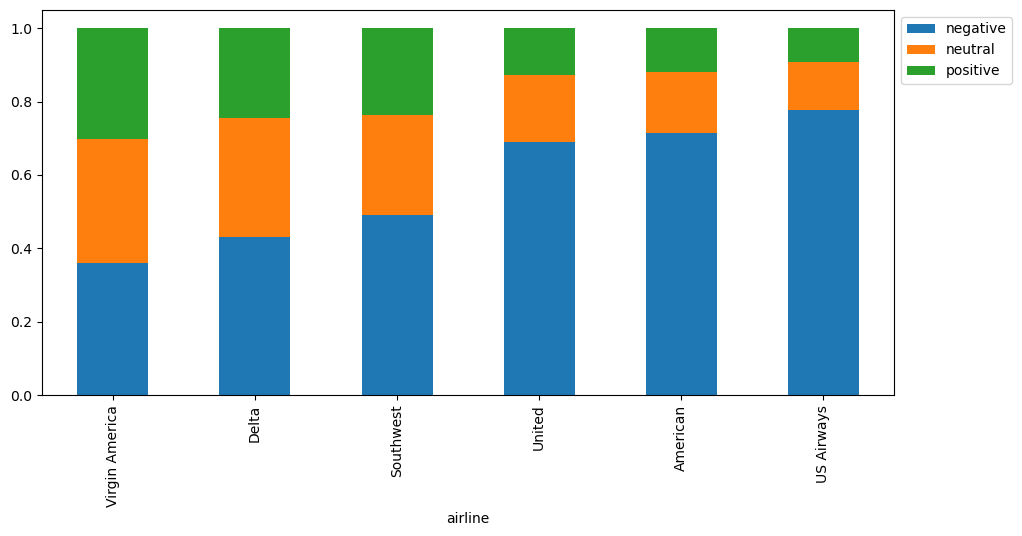

In [39]:
stacked_barplot(data, "airline", "airline_sentiment")

### Distribution of all the negative reasons

In [40]:
NR_Count=dict(data['negativereason'].value_counts(sort=False))

def NR_Count(Airline):
    if Airline=='All':
        df=data
    else:
        df=data[data['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(data['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame


def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

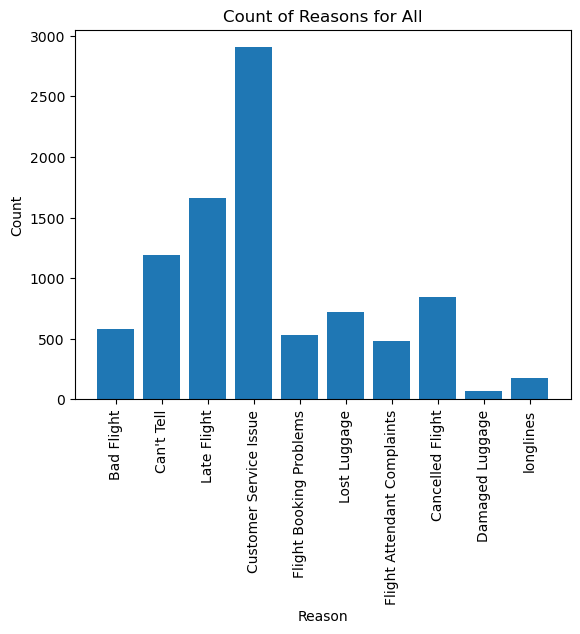

In [41]:
plot_reason('All')

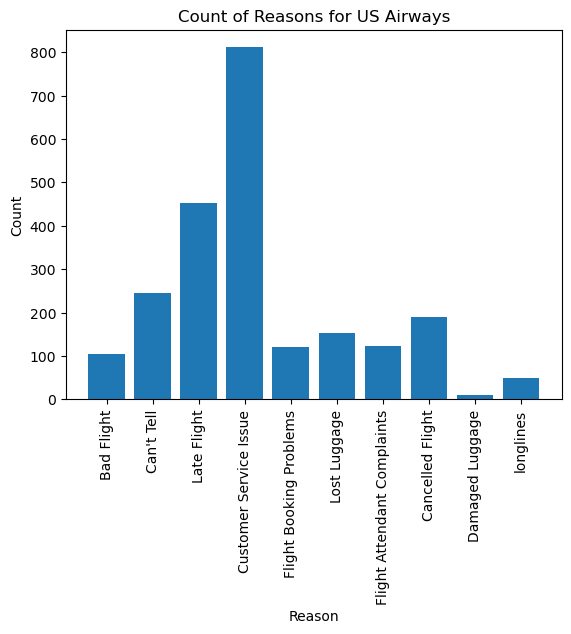

In [42]:
plot_reason('US Airways')

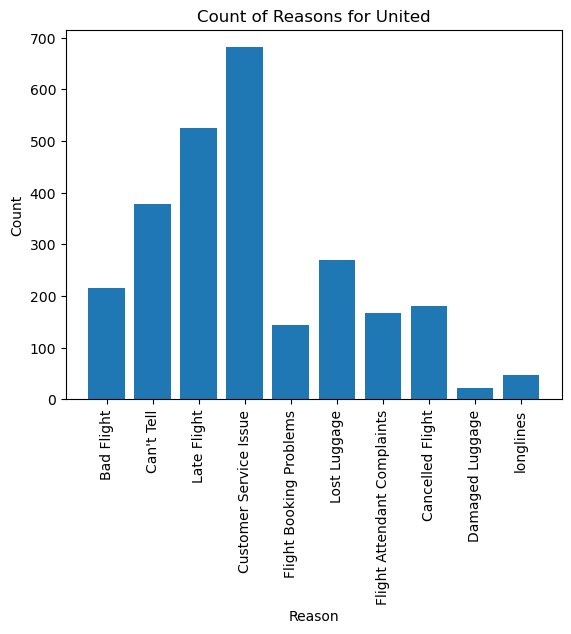

In [43]:
plot_reason('United')

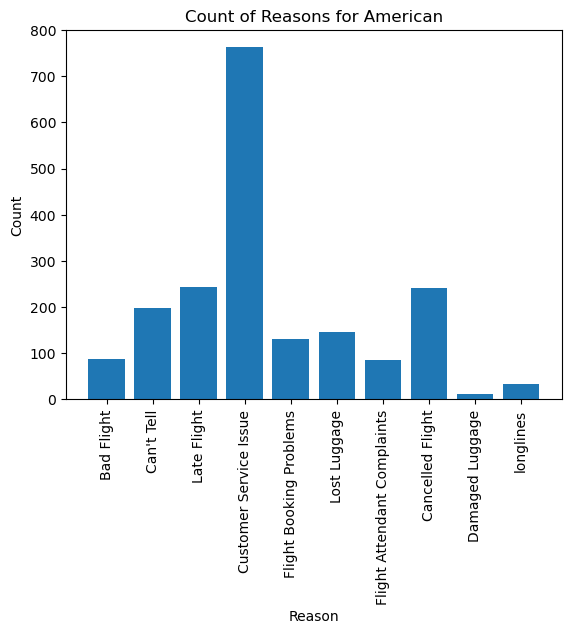

In [44]:
plot_reason('American')

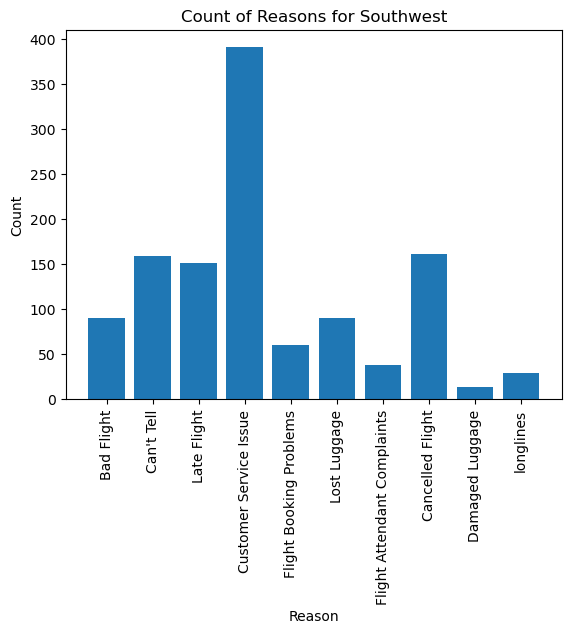

In [45]:
plot_reason('Southwest')

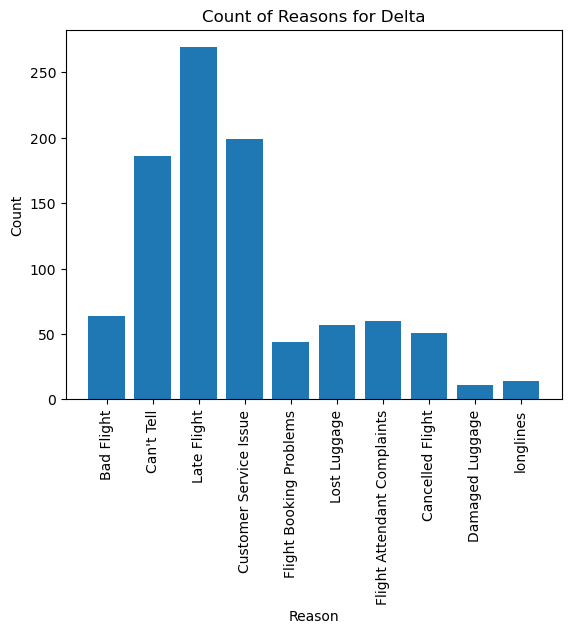

In [46]:
plot_reason('Delta')

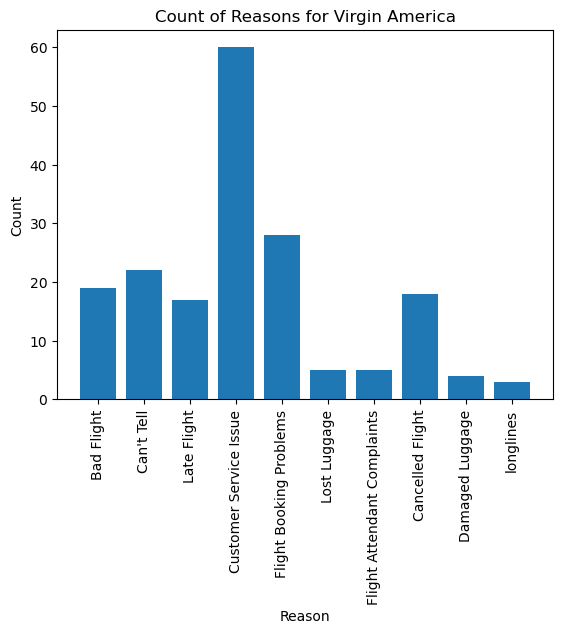

In [47]:
plot_reason('Virgin America')

#### Airline vs location

In [48]:
data.corr()

,airline_sentiment_confidence,negativereason_confidence,retweet_count
airline_sentiment_confidence,1.000000,0.685626,0.012699
negativereason_confidence,0.685626,1.000000,0.021687
retweet_count,0.012699,0.021687,1.000000


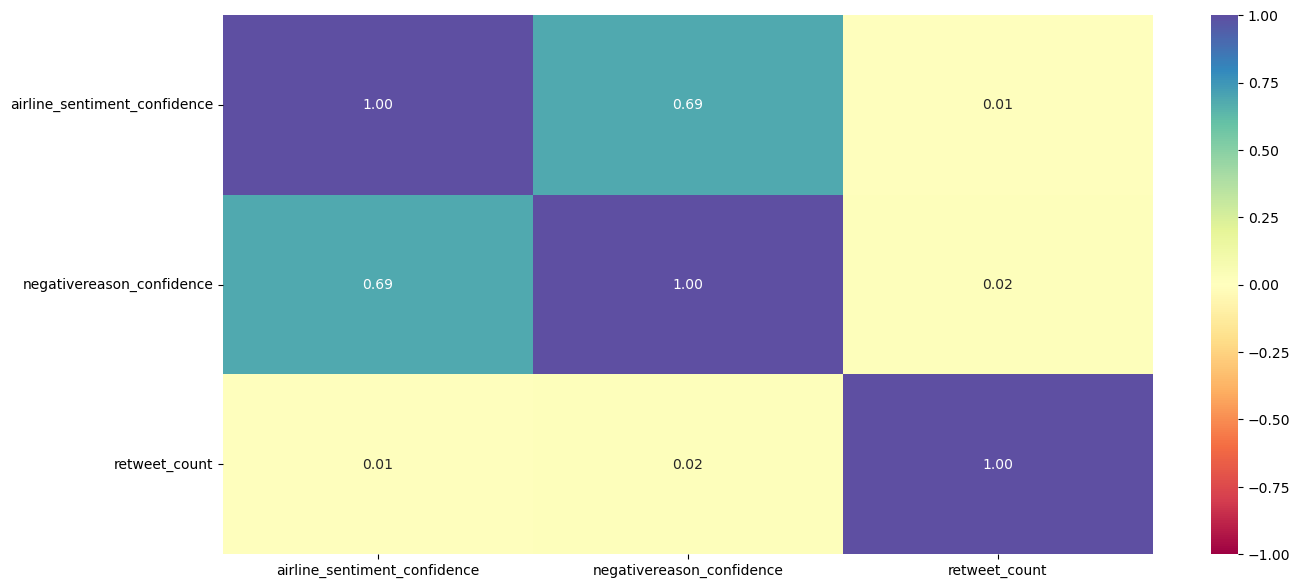

In [49]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Pairplots**

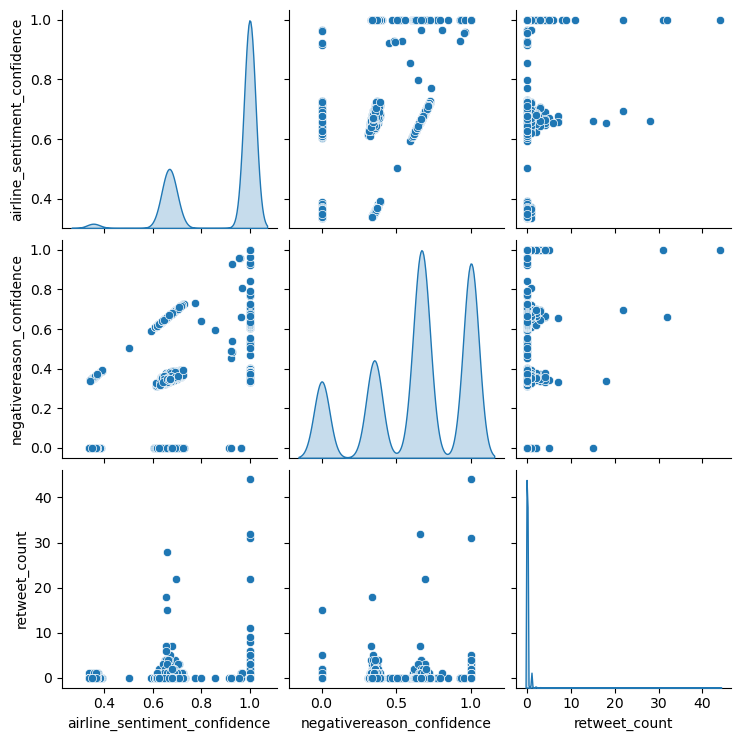

In [50]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

sns.pairplot(
    data=data[
        [
            "World Rank",
            "GDP Growth Rate (%)",
            "GDP per Capita (PPP)",
            "Public Debt (% of GDP)",
        ]
    ],
    hue="World Rank",
)

plt.show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

x = df["World Rank"]
y = df["GDP per Capita (PPP)"]
z = df["Public Debt (% of GDP)"]


ax.scatter(x, y, z, marker=".")
ax.set_xlabel("World Rank")
ax.set_ylabel("GDP per Capita (PPP)")
ax.set_zlabel("Public Debt (% of GDP)")
ax.view_init(azim=60)
plt.show()

### Outlier detection

In [51]:
threshold = 3
outlier = {}
num_cols = data.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    i = data[col]
    mean = np.mean(data[col])
    std = np.std(data[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 airline_sentiment_confidence : []

 negativereason_confidence : []

 retweet_count : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 9, 11, 15, 18, 22, 22, 28, 31, 32, 44]


## Inferences

* United Airlines has the highest percentage of occurrences, accounting for 26.11% of the data.
* US Airways and American Airlines follow closely, with approximately 19.90% and 18.85% respectively.
* Southwest Airlines and Delta Airlines have similar percentages, with Southwest at 16.53% and Delta at 15.18%.
* Virgin America has the lowest percentage of occurrences among the listed airlines, with only 3.44% of the data.
* The majority of sentiments expressed in the dataset are negative, accounting for 62.69% of the data.
* Neutral sentiments make up approximately 21.17% of the dataset.
* Positive sentiments are the least frequent, representing 16.14% of the data.

American Airlines:
* The majority of sentiments expressed towards American Airlines are negative, accounting for approximately 71.04% of the sentiments.
* Neutral sentiments make up about 16.78% of the sentiments, while positive sentiments represent 12.18%.
* The most common negative reason is "Customer Service Issue" with 762 occurrences.
* Other frequent negative reasons include "Cancelled Flight" (242), "Late Flight" (244), and "Lost Luggage" (146).

Delta Airlines:
* Negative sentiments towards Delta Airlines account for approximately 42.98% of the sentiments.
* Neutral sentiments make up about 32.54% of the sentiments, while positive sentiments represent 24.48%.
* The most common negative reason is "Customer Service Issue" with 199 occurrences.
* Other frequent negative reasons include "Late Flight" (269) and "Cancelled Flight" (51).

Southwest Airlines:
* Negative sentiments towards Southwest Airlines account for approximately 49.01% of the sentiments.
* Neutral sentiments make up about 27.44% of the sentiments, while positive sentiments represent 23.55%.
* The most common negative reason is "Customer Service Issue" with 391 occurrences.
* Other frequent negative reasons include "Cancelled Flight" (162) and "Late Flight" (152).

US Airways:
* The majority of sentiments expressed towards US Airways are negative, accounting for approximately 77.69% of the sentiments.
* Neutral sentiments make up about 13.08% of the sentiments, while positive sentiments represent 9.23%.
* The most common negative reason is "Customer Service Issue" with 811 occurrences.
* Other frequent negative reasons include "Cancelled Flight" (189), "Late Flight" (453), and "Lost Luggage" (154).

United Airlines:
* Negative sentiments towards United Airlines account for approximately 68.89% of the sentiments.
* Neutral sentiments make up about 18.24% of the sentiments, while positive sentiments represent 12.87%.
* The most common negative reason is "Customer Service Issue" with 681 occurrences.
* Other frequent negative reasons include "Cancelled Flight" (181), "Late Flight" (525), and "Lost Luggage" (269).

Virgin America:
* Negative sentiments towards Virgin America account for approximately 35.91% of the sentiments.
* Neutral sentiments make up about 33.93% of the sentiments, while positive sentiments represent 30.16%.
* The most common negative reason is "Customer Service Issue" with 60 occurrences.
* Other frequent negative reasons include "Cancelled Flight" (18) and "Late Flight" (17).

* The majority of negative sentiment tweets do not have a specified location (NaN), accounting for 3142 occurrences. This suggests that a significant number of users did not provide their location when expressing negative sentiments.

* Among the specified locations for negative sentiment tweets, the top locations mentioned are:
** Washington, DC with 111 occurrences.
** Boston, MA with 103 occurrences.
** New York, NY with 93 occurrences.
** New York (without specifying the state) with 86 occurrences.

* It's important to note that the dataset contains a variety of locations, with a total of 1988 unique values. However, the frequency of specific locations drops significantly after the top few mentioned above.

* The majority of tweets in the dataset have no retweets, with a count of 0. This suggests that a significant portion of the tweets did not receive any retweets.
* Among the tweets that did receive retweets, the count is relatively low. The counts range from 1 to 32, with the most common counts being 1, 2, 3, and 4.
* The distribution of retweet counts shows a steep decline as the count increases. The number of tweets with counts higher than 4 decreases significantly, indicating that the majority of tweets in the dataset received a low number of retweets.
* It's important to note that the dataset does not specify whether the retweets were performed by other users or by the original author of the tweet. The retweet count represents the number of retweets a tweet has received but does not provide information about the reach or engagement of those retweets.


## Data Pre-Processing

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.
- Remove numbers.
- Tokenization.
- Remove Stopwords.
- Lemmatized data.
- We have used the NLTK library to tokenize words, remove stopwords and lemmatize the remaining words.

In [52]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    return text
data['text'] = data['text'].apply(lambda x: clean_text(x))
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you have added commercials...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I did not today... Must mean I ...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it is really aggressive to blas...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it is a really big bad thin...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Word Cloud for Negative Reviews

In [53]:
#creating word cloud for negative reviews
negative_reviews=data[data['airline_sentiment']=='negative']
words = ' '.join(negative_reviews['negativereason'])
cleaned_word = " ".join([word for word in words.split()])

In [54]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

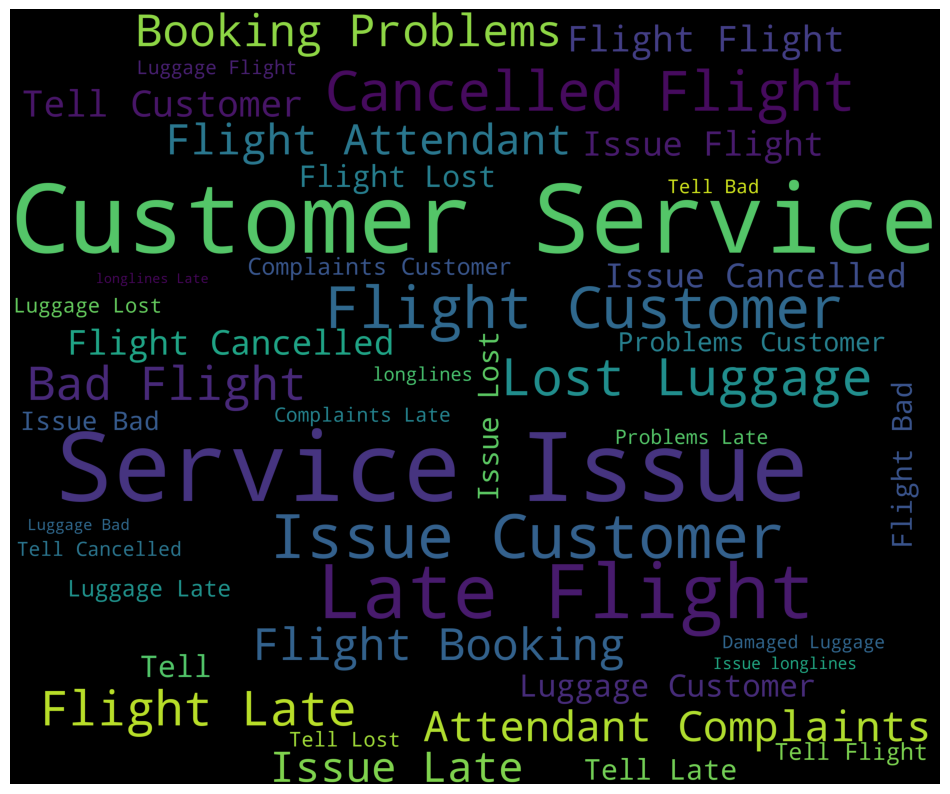

In [55]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Word Cloud for Positive Reviews

In [56]:
# Convert 'negativereason' column to strings
negative_reviews.loc[:, 'negativereason'] = negative_reviews['negativereason'].astype(str)

# Joining the 'negativereason' values
words = ' '.join(negative_reviews['negativereason'])

# Cleaning the joined words
cleaned_word = " ".join([word for word in words.split()])

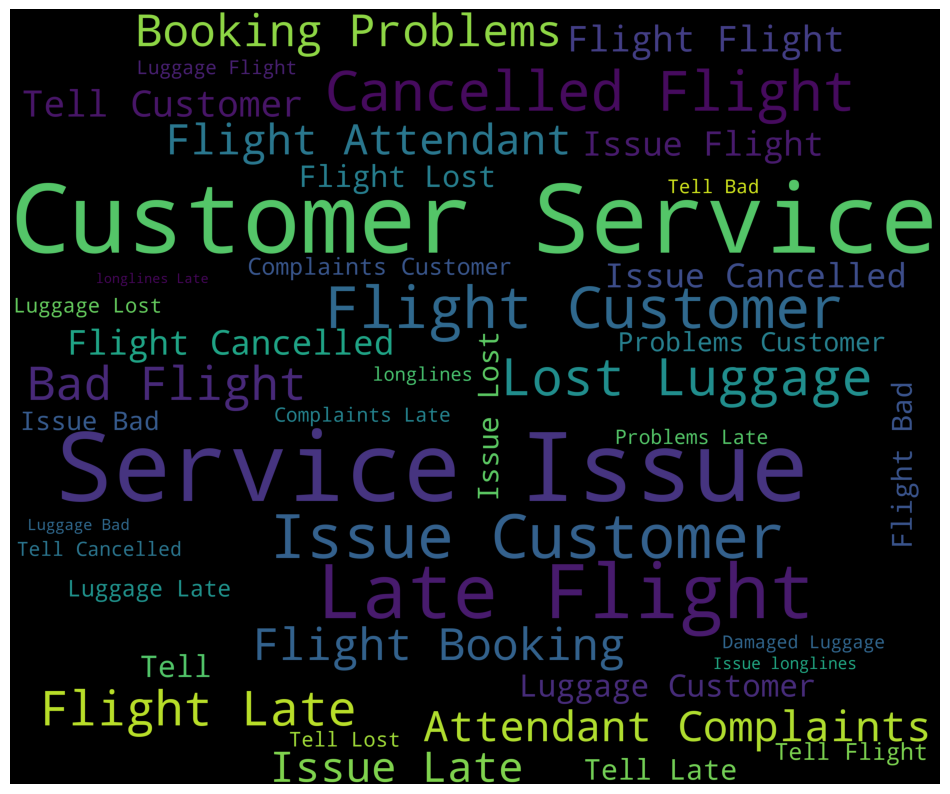

In [57]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Tokenization

In [58]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,0,"[@, VirginAmerica, What, @, dhepburn, said, .]",2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,0,"[@, VirginAmerica, plus, you, have, added, com...",2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,0,"[@, VirginAmerica, I, did, not, today, ..., Mu...",2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,0,"[@, VirginAmerica, it, is, really, aggressive,...",2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,0,"[@, VirginAmerica, and, it, is, a, really, big...",2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Stopword, Lemmitization and Normalize

In [59]:
stopwords = stopwords.words('english')
stopwords = list(set(stopwords)) 
lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

#data['review'] = data['review'].astype(str)
data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)

In [60]:
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,0,virginamerica dhepburn say,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,0,virginamerica plus add commercials experience ...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,0,virginamerica today must mean need take anothe...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,0,virginamerica really aggressive blast obnoxiou...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,0,virginamerica really big bad thing,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Columns Preparing 

In [61]:
columns_to_keep = ['airline_sentiment', 'text']
data = data[columns_to_keep]
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica today must mean need take anothe...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


In [62]:
data.head()
data['airline_sentiment'] = data['airline_sentiment'].apply(lambda x: 1 if x =='negative' else 0)
data.head()

,airline_sentiment,text
0,0,virginamerica dhepburn say
1,0,virginamerica plus add commercials experience ...
2,0,virginamerica today must mean need take anothe...
3,1,virginamerica really aggressive blast obnoxiou...
4,1,virginamerica really big bad thing


## Supervised Learning for Sentiment Analysis

### Bag of Words (CountVectorizer)

In [63]:
# Vectorization (Convert text data to numbers).
# Keep only 100 features as number of features will increase the processing time.
Count_vec = CountVectorizer(max_features = 5000)  

data_features = Count_vec.fit_transform(data['text'])

# Convert the data features to array
data_features = data_features.toarray()      

In [64]:
data_features.shape

(14604, 5000)

In [65]:
X = data_features
y = data.airline_sentiment

In [66]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['negative_sentiment', 'postive+neutral_sentiment'], yticklabels = ['negative_sentiment', 'postive+neutral_sentiment'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [67]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

              precision    recall  f1-score   support

           0       0.69      0.60      0.64      1175
           1       0.86      0.90      0.88      3207

    accuracy                           0.82      4382
   macro avg       0.77      0.75      0.76      4382
weighted avg       0.81      0.82      0.81      4382



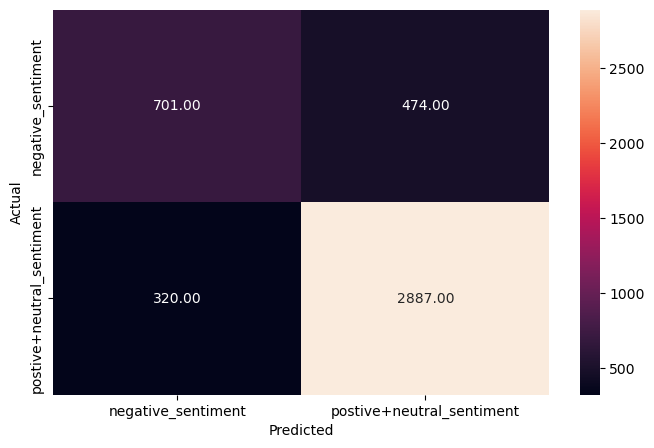

In [68]:
# Training the best model and calculating accuracy on test data 

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)

metrics_score(y_test, y_pred_test)

In [69]:
def get_top40_words(model, all_features):
    
    # Addition of top 40 feature into top_feature after training the model
    top_features=''   

    feat = model.feature_importances_

    features = np.argsort(feat)[::-1]

    for i in features[0:40]:
        top_features+=all_features[i]
        top_features+=','    

    from wordcloud import WordCloud
    
    wordcloud = WordCloud(background_color = "white", colormap = 'viridis', width = 2000, 
                              height = 1000).generate(top_features)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.figure(1, figsize = (14, 11), frameon='equal')
    plt.title('Top 40 features WordCloud', fontsize = 10)
    plt.axis("off")
    plt.show()

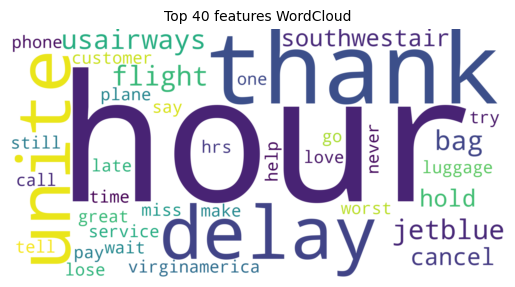

In [70]:
 #Instantiate the feature from the vectorizer
    
features = Count_vec.get_feature_names_out()   
get_top40_words(clf,features)


## TF-IDF

In [71]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features = 5000)

data_features = tfidf_vect.fit_transform(data['text'])

data_features = data_features.toarray()

# Feature shape
data_features.shape     

(14604, 5000)

In [72]:
X = data_features
y = data.airline_sentiment

              precision    recall  f1-score   support

           0       0.70      0.60      0.64      1175
           1       0.86      0.90      0.88      3207

    accuracy                           0.82      4382
   macro avg       0.78      0.75      0.76      4382
weighted avg       0.82      0.82      0.82      4382



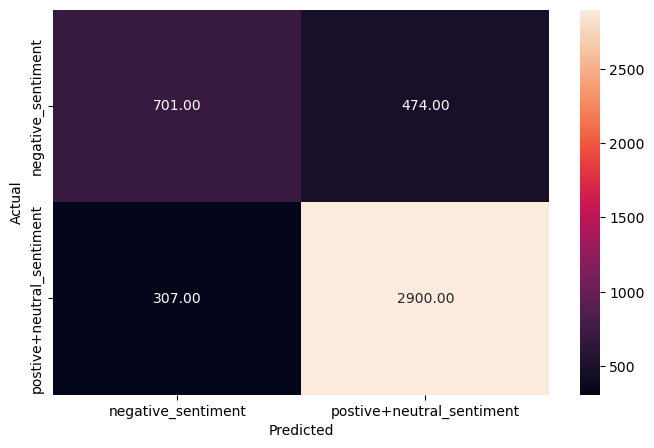

In [73]:
# Training the best model and calculating accuracy on test data 

clf1 = RandomForestClassifier(n_estimators = 100)

clf1.fit(X_train, y_train)

y_pred_test1 = clf1.predict(X_test)

metrics_score(y_test, y_pred_test1)

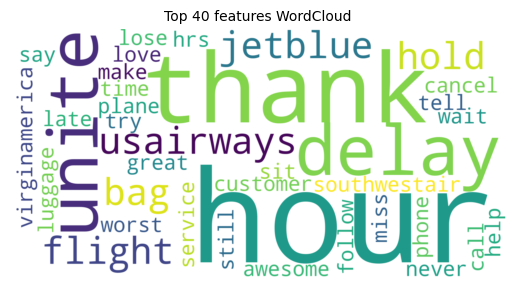

In [74]:
#Instantiate the feature from the vectorizer    
features = tfidf_vect.get_feature_names_out()  

get_top40_words(clf1,features)

## Comparision

In [75]:
#convert the test samples into a dataframe where the columns are

#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),
#Count Vectorizer model predicted labels(count_vectorizer_predicted)

df = pd.DataFrame(y_test.tolist(), columns = ['y_test'])

df['count_vectorizer_predicted'] = y_pred_test

df['tf_idf_predicted'] = y_pred_test1

df.head()

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


## Unsupervised Learning methods for Sentiment Analysis

### VADER

In [76]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sentiment = SentimentIntensityAnalyzer()

In [77]:
data_new = data.copy()   # make a copy of dataframe and do unsupervised operations on that dataframe

In [78]:
# Calculate the polarity score of the reviews
data_new['scores'] = data_new['text'].apply(lambda text: sentiment.polarity_scores(text))

data_new.head()

,airline_sentiment,text,scores
0,0,virginamerica dhepburn say,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,0,virginamerica plus add commercials experience ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,0,virginamerica today must mean need take anothe...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,1,virginamerica really aggressive blast obnoxiou...,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'co..."
4,1,virginamerica really big bad thing,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'comp..."


In [79]:
# Calculate the compund score of the reviews
data_new['compound']  = data_new['scores'].apply(lambda score_dict: score_dict['compound'])

data_new.head()

,airline_sentiment,text,scores,compound
0,0,virginamerica dhepburn say,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,0,virginamerica plus add commercials experience ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,0,virginamerica today must mean need take anothe...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,1,virginamerica really aggressive blast obnoxiou...,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'co...",-0.3306
4,1,virginamerica really big bad thing,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'comp...",-0.5829


In [80]:
# Classify the class of the review by keeping threshold on the compund score

data_new['comp_score'] = data_new['compound'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,airline_sentiment,text,scores,compound,comp_score
0,0,virginamerica dhepburn say,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
1,0,virginamerica plus add commercials experience ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
2,0,virginamerica today must mean need take anothe...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
3,1,virginamerica really aggressive blast obnoxiou...,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'co...",-0.3306,0
4,1,virginamerica really big bad thing,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'comp...",-0.5829,0


In [81]:
data["VADER_pred"] = data_new['comp_score'].tolist()
data.head()

,airline_sentiment,text,VADER_pred
0,0,virginamerica dhepburn say,1
1,0,virginamerica plus add commercials experience ...,1
2,0,virginamerica today must mean need take anothe...,1
3,1,virginamerica really aggressive blast obnoxiou...,0
4,1,virginamerica really big bad thing,0


              precision    recall  f1-score   support

           0       0.11      0.09      0.10      5445
           1       0.51      0.56      0.53      9159

    accuracy                           0.38     14604
   macro avg       0.31      0.32      0.31     14604
weighted avg       0.36      0.38      0.37     14604



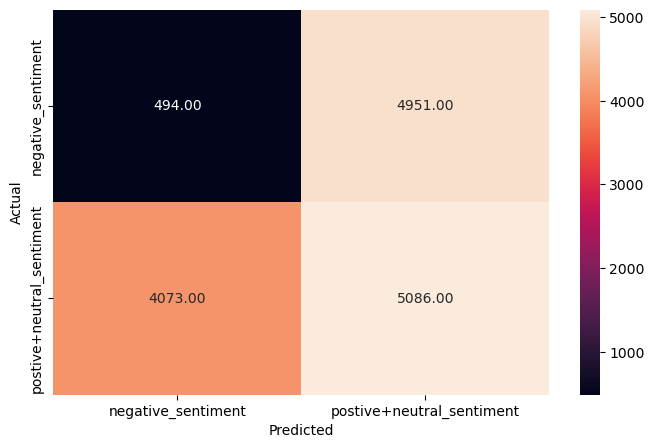

In [82]:
# Calculate the accuracy of the Vader Sentiment Analysis
data["airline_sentiment"] = data["airline_sentiment"].astype(int)   #convert the sentiment column values into int data type

data["VADER_pred"] = data["VADER_pred"].astype(int) #convert the vader_predicted column values into int data type

metrics_score(data["airline_sentiment"], data["VADER_pred"])

## TextBlob

In [83]:
from textblob import TextBlob

In [84]:
data_new = data.copy()      # make a copy of dataframe and do unsupervised operations on that dataframe

In [85]:
# Calculate the polarity score of the reviews
data_new['polarity']  = data_new['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

data_new.head()

,airline_sentiment,text,VADER_pred,polarity
0,0,virginamerica dhepburn say,1,0.00000
1,0,virginamerica plus add commercials experience ...,1,0.00000
2,0,virginamerica today must mean need take anothe...,1,-0.31250
3,1,virginamerica really aggressive blast obnoxiou...,0,0.00625
4,1,virginamerica really big bad thing,0,-0.35000


In [86]:
# Classify the class of the review by keeping threshold on the polarity score
data_new['polarity_score'] = data_new['polarity'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,airline_sentiment,text,VADER_pred,polarity,polarity_score
0,0,virginamerica dhepburn say,1,0.00000,1
1,0,virginamerica plus add commercials experience ...,1,0.00000,1
2,0,virginamerica today must mean need take anothe...,1,-0.31250,0
3,1,virginamerica really aggressive blast obnoxiou...,0,0.00625,1
4,1,virginamerica really big bad thing,0,-0.35000,0


In [87]:
data["Text_Blob_pred"] = data_new['polarity_score'].tolist()
data.head()

,airline_sentiment,text,VADER_pred,Text_Blob_pred
0,0,virginamerica dhepburn say,1,1
1,0,virginamerica plus add commercials experience ...,1,1
2,0,virginamerica today must mean need take anothe...,1,0
3,1,virginamerica really aggressive blast obnoxiou...,0,1
4,1,virginamerica really big bad thing,0,0


              precision    recall  f1-score   support

           0       0.12      0.07      0.08      5445
           1       0.56      0.71      0.63      9159

    accuracy                           0.47     14604
   macro avg       0.34      0.39      0.36     14604
weighted avg       0.40      0.47      0.43     14604



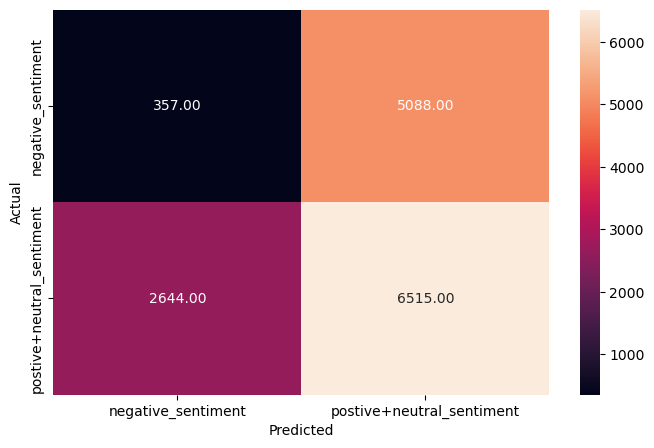

In [88]:
# Calculate the accuracy of the Vader Sentiment Analysis
data["airline_sentiment"] = data["airline_sentiment"].astype(int)   #convert the sentiment column values into int data type

data["Text_Blob_pred"] = data["Text_Blob_pred"].astype(int)  #convert the textblob predicted column values into int data type

metrics_score(data["airline_sentiment"], data["Text_Blob_pred"])

In [89]:
### Comparing the accuracies of Unsupervised Learning methods VADER and TextBlob**

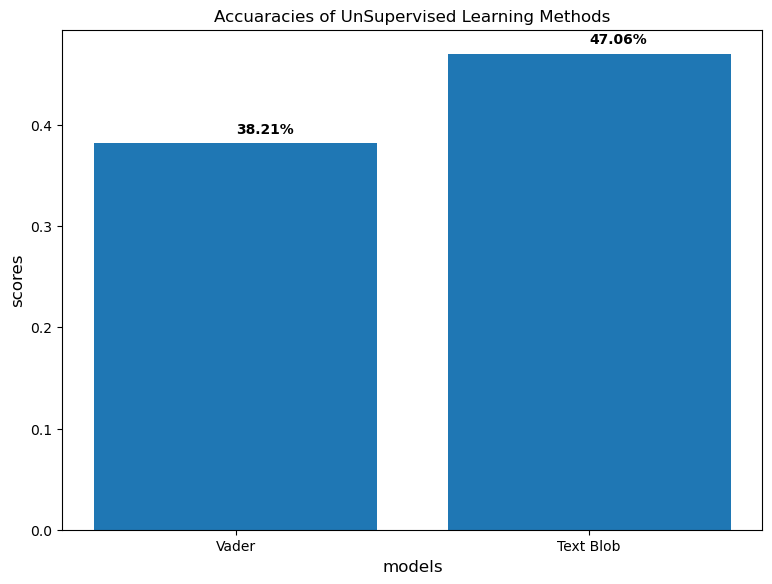

In [90]:
#plot the accuaracies of the text blob and Vader
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Vader', 'Text Blob']
# calculation accuracies of Vader and Textblob models using accuracy_score metrics
scores = [accuracy_score(data["airline_sentiment"].tolist(),data["VADER_pred"].tolist()),accuracy_score(data["airline_sentiment"].tolist(),data["Text_Blob_pred"].tolist())]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)   # y-axis labels
ax.set_xlabel('models',fontsize= 12)   # x-axis labels
ax.set_title('Accuaracies of UnSupervised Learning Methods')   #tittle of the graph
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

# Deep Nural Network

In [91]:
data.head()

,airline_sentiment,text,VADER_pred,Text_Blob_pred
0,0,virginamerica dhepburn say,1,1
1,0,virginamerica plus add commercials experience ...,1,1
2,0,virginamerica today must mean need take anothe...,1,0
3,1,virginamerica really aggressive blast obnoxiou...,0,1
4,1,virginamerica really big bad thing,0,0


In [92]:
columns_to_keep = ['airline_sentiment', 'text']
data = data[columns_to_keep]
data.head()

,airline_sentiment,text
0,0,virginamerica dhepburn say
1,0,virginamerica plus add commercials experience ...
2,0,virginamerica today must mean need take anothe...
3,1,virginamerica really aggressive blast obnoxiou...
4,1,virginamerica really big bad thing


In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10222, 5000)
(4382, 5000)
(10222,)
(4382,)


### Model #1

In [94]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [95]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### Intializing Tokeinzer

In [96]:
# Creating the tokenizer with 700 vocab size
tokenizer = Tokenizer(num_words = 700, split = ' ') 

tokenizer.fit_on_texts(data['text'].values)

# converting text to sequences
X = tokenizer.texts_to_sequences(data['text'].values)

# Padding the sequences
X = pad_sequences(X)

### Model Building

In [97]:
model = Sequential()

# model will take as input an integer matrix of size (batch, input_length), and the largest integer (i.e. word index) in the input
# should be no larger than vocabulary size. Now model.output_shape is (None, input_length, 256), where `None` is the batch dimension.
# input_length is X_data[1] = 700 here.
model.add(Embedding(700, 120, input_length = X.shape[1]))

model.add(SpatialDropout1D(0.2))

 # return_sequences = True means each LSTM cell in it is outputting its value.The output of the layer is a sequence of outputs.
model.add(LSTM(150, dropout = 0.2, recurrent_dropout = 0.2))

model.add(Dense(2, activation = 'softmax'))

# compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [98]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 19, 120)           84000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 19, 120)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 150)               162600    
                                                                 
 dense (Dense)               (None, 2)                 302       
                                                                 
Total params: 246,902
Trainable params: 246,902
Non-trainable params: 0
_________________________________________________________________
None


### Splitting the data

In [99]:
# creating the target feature
y = pd.get_dummies(data['airline_sentiment'])

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [100]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10222, 19)
(4382, 19)
(10222, 2)
(4382, 2)


In [101]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs and validation_split as 10%
history=model.fit(X_train, 
          y_train,  
          epochs=30, 
          batch_size=32,validation_split=0.10,callbacks=[es, mc])  

Epoch 1/30
286/288 [============================>.] - ETA: 0s - loss: 0.4669 - accuracy: 0.7791
Epoch 1: val_accuracy improved from -inf to 0.81427, saving model to best_model.h5
288/288 [==============================] - 7s 18ms/step - loss: 0.4663 - accuracy: 0.7793 - val_loss: 0.4077 - val_accuracy: 0.8143
Epoch 2/30
286/288 [============================>.] - ETA: 0s - loss: 0.3909 - accuracy: 0.8231
Epoch 2: val_accuracy did not improve from 0.81427
288/288 [==============================] - 5s 18ms/step - loss: 0.3909 - accuracy: 0.8228 - val_loss: 0.4159 - val_accuracy: 0.8025
Epoch 3/30
288/288 [==============================] - ETA: 0s - loss: 0.3712 - accuracy: 0.8331
Epoch 3: val_accuracy did not improve from 0.81427
288/288 [==============================] - 4s 16ms/step - loss: 0.3712 - accuracy: 0.8331 - val_loss: 0.4165 - val_accuracy: 0.8035
Epoch 4/30
287/288 [============================>.] - ETA: 0s - loss: 0.3531 - accuracy: 0.8418
Epoch 4: val_accuracy did not impro

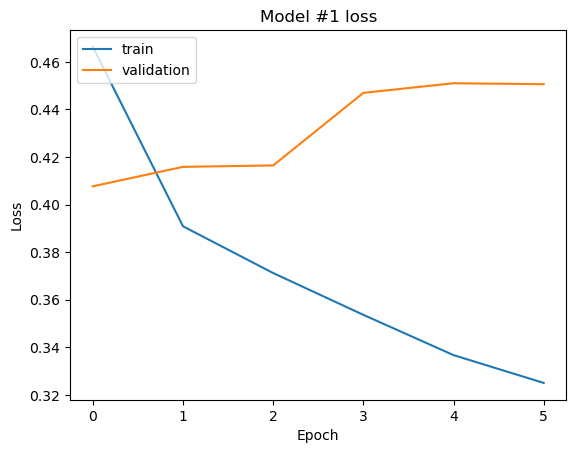

In [102]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model #1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [103]:
model.evaluate(X_test,y_test)
y_pred = model.predict(X_test)
y_pred

137/137 [==============================] - 1s 3ms/step


array([[0.9830822 , 0.01691781],
       [0.7258029 , 0.2741971 ],
       [0.02328779, 0.9767122 ],
       ...,
       [0.19986922, 0.8001308 ],
       [0.33149654, 0.66850346],
       [0.5358897 , 0.46411037]], dtype=float32)

Confusion matrix for label 'Negative':
[[2411  385]
 [ 424 1162]]
Confusion matrix for label 'Non_negative':
[[1162  424]
 [ 385 2411]]


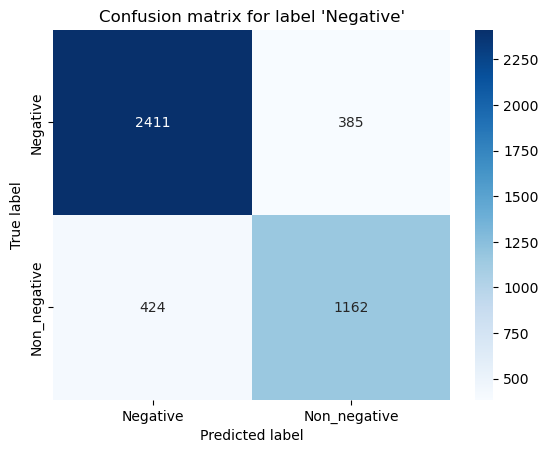

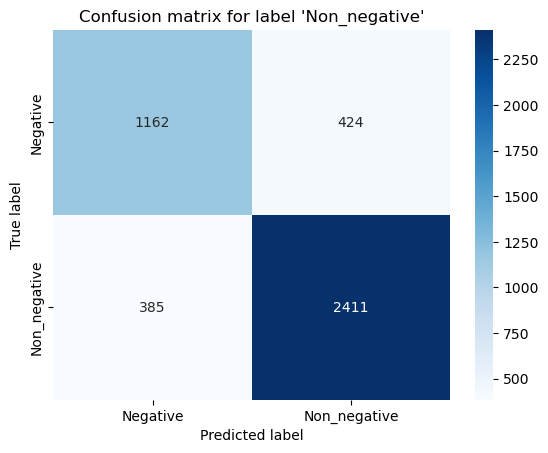

In [104]:
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

# Convert predicted probabilities to binary predictions
threshold = 0.5  # Adjust the threshold as needed
y_pred_binary = np.where(y_pred >= threshold, 1, 0)
y_test_binary = np.where(y_test >= threshold, 1, 0)

# Calculate the multilabel confusion matrix
cm = multilabel_confusion_matrix(y_test_binary, y_pred_binary)

# Define the categories (labels for each class)
categories = ['Negative', 'Non_negative']  # Replace with your actual class labels

# Display the confusion matrix for each label
for i, label in enumerate(categories):
    print(f"Confusion matrix for label '{label}':")
    print(cm[i])
    
# Calculate the multilabel confusion matrix
cm = multilabel_confusion_matrix(y_test_binary, y_pred_binary)

# Define the categories (labels for each class)
categories = ['Negative', 'Non_negative']  # Replace with your actual class labels

# Display the confusion matrix for each label
for i, label in enumerate(categories):
    # Create a heatmap for the confusion matrix
    sns.heatmap(cm[i], annot=True, fmt='d', cmap='Blues')

    # Add labels, title, and axis ticks
    plt.title(f"Confusion matrix for label '{label}'")
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.xticks([0.5, 1.5], ['Negative', 'Non_negative'])
    plt.yticks([0.5, 1.5], ['Negative', 'Non_negative'])

    # Show the plot
    plt.show()


In [105]:
from sklearn.metrics import classification_report

# Define the labels
labels = ['Negative', 'Non_negative']

# Calculate the classification report
classification_rep = classification_report(y_test_binary, y_pred_binary, target_names=labels)

# Print the classification report
print("Classification Report:")
print(classification_rep)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.73      0.74      1586
Non_negative       0.85      0.86      0.86      2796

   micro avg       0.82      0.82      0.82      4382
   macro avg       0.80      0.80      0.80      4382
weighted avg       0.81      0.82      0.81      4382
 samples avg       0.82      0.82      0.82      4382

Accuracy: 0.8153811045184847


### Model #2

In [106]:
model_2=Sequential()
model_2.add(Embedding(5000,40,input_length=X.shape[1]))
model_2.add(Dropout(0.3))
model_2.add(LSTM(100))
model_2.add(Dropout(0.3))
model_2.add(Dense(2,activation='sigmoid'))
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [107]:
print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 19, 40)            200000    
                                                                 
 dropout (Dropout)           (None, 19, 40)            0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 256,602
Trainable params: 256,602
Non-trainable params: 0
_________________________________________________________________
None


In [108]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs and validation_split as 10%
history_2=model_2.fit(X_train, 
          y_train,  
          epochs=30, 
          batch_size=32,validation_split=0.10,callbacks=[es, mc])  

Epoch 1/30
288/288 [==============================] - ETA: 0s - loss: 0.5020 - accuracy: 0.7563
Epoch 1: val_accuracy improved from -inf to 0.80547, saving model to best_model.h5
288/288 [==============================] - 4s 10ms/step - loss: 0.5020 - accuracy: 0.7563 - val_loss: 0.4122 - val_accuracy: 0.8055
Epoch 2/30
283/288 [============================>.] - ETA: 0s - loss: 0.3942 - accuracy: 0.8201
Epoch 2: val_accuracy did not improve from 0.80547
288/288 [==============================] - 3s 9ms/step - loss: 0.3935 - accuracy: 0.8205 - val_loss: 0.4060 - val_accuracy: 0.8035
Epoch 3/30
288/288 [==============================] - ETA: 0s - loss: 0.3772 - accuracy: 0.8337
Epoch 3: val_accuracy did not improve from 0.80547
288/288 [==============================] - 3s 9ms/step - loss: 0.3772 - accuracy: 0.8337 - val_loss: 0.4124 - val_accuracy: 0.8016
Epoch 4/30
284/288 [============================>.] - ETA: 0s - loss: 0.3660 - accuracy: 0.8341
Epoch 4: val_accuracy did not improve

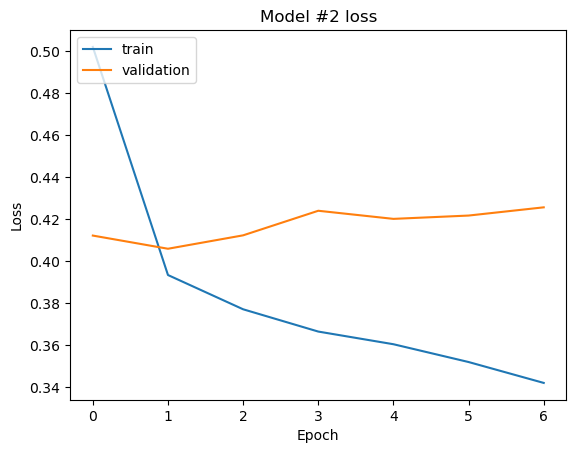

In [109]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model #2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [110]:
model_2.evaluate(X_test,y_test)
y_pred_2 = model_2.predict(X_test)
y_pred_2

137/137 [==============================] - 1s 2ms/step


array([[0.97295797, 0.02874942],
       [0.6654926 , 0.34260496],
       [0.09902986, 0.9000505 ],
       ...,
       [0.14855236, 0.8482751 ],
       [0.4370018 , 0.5594777 ],
       [0.6217066 , 0.39432788]], dtype=float32)

Confusion matrix for label 'Negative':
[[2446  350]
 [ 431 1155]]
Confusion matrix for label 'Non_negative':
[[1152  434]
 [ 348 2448]]


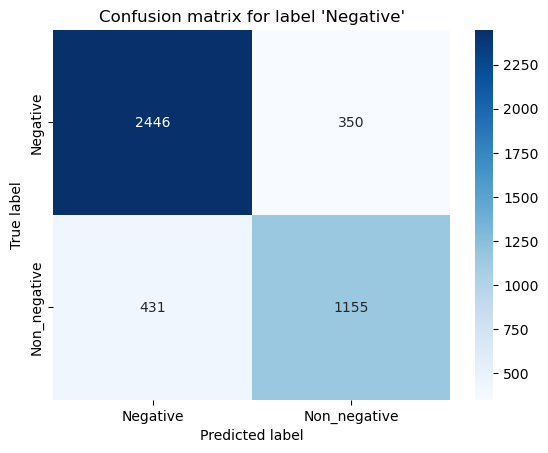

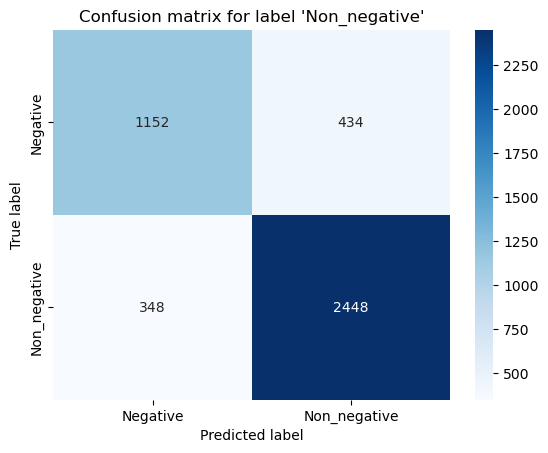

In [111]:
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

# Convert predicted probabilities to binary predictions
threshold = 0.5  # Adjust the threshold as needed
y_pred_binary = np.where(y_pred_2 >= threshold, 1, 0)
y_test_binary = np.where(y_test >= threshold, 1, 0)

# Calculate the multilabel confusion matrix
cm = multilabel_confusion_matrix(y_test_binary, y_pred_binary)

# Define the categories (labels for each class)
categories = ['Negative', 'Non_negative']  # Replace with your actual class labels

# Display the confusion matrix for each label
for i, label in enumerate(categories):
    print(f"Confusion matrix for label '{label}':")
    print(cm[i])
    
# Calculate the multilabel confusion matrix
cm = multilabel_confusion_matrix(y_test_binary, y_pred_binary)

# Define the categories (labels for each class)
categories = ['Negative', 'Non_negative']  # Replace with your actual class labels

# Display the confusion matrix for each label
for i, label in enumerate(categories):
    # Create a heatmap for the confusion matrix
    sns.heatmap(cm[i], annot=True, fmt='d', cmap='Blues')

    # Add labels, title, and axis ticks
    plt.title(f"Confusion matrix for label '{label}'")
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.xticks([0.5, 1.5], ['Negative', 'Non_negative'])
    plt.yticks([0.5, 1.5], ['Negative', 'Non_negative'])

    # Show the plot
    plt.show()


In [112]:
from sklearn.metrics import classification_report

# Define the labels
labels = ['Negative', 'Non_negative']

# Calculate the classification report
classification_rep = classification_report(y_test_binary, y_pred_binary, target_names=labels)

# Print the classification report
print("Classification Report:")
print(classification_rep)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.77      0.73      0.75      1586
Non_negative       0.85      0.88      0.86      2796

   micro avg       0.82      0.82      0.82      4382
   macro avg       0.81      0.80      0.80      4382
weighted avg       0.82      0.82      0.82      4382
 samples avg       0.82      0.82      0.82      4382

Accuracy: 0.820629849383843


In [113]:
import pandas as pd

# Create a dictionary with the classification report data for each model
comp = {
    'Model': ['Model #1', 'Model #2'],
    'Precision (Negative)': [0.75, 0.77],
    'Recall (Negative)': [0.73, 0.73],
    'F1-score (Negative)': [0.74, 0.75],
    'Support (Negative)': [1586, 1586],
    'Precision (Non_negative)': [0.85, 0.85],
    'Recall (Non_negative)': [0.86, 0.88],
    'F1-score (Non_negative)': [0.86, 0.86],
    'Support (Non_negative)': [2796, 2796],
    'Accuracy': [0.813555454130534, 0.820629849383843]
}

# Create the DataFrame
comp_df = pd.DataFrame(comp)
comp_df.head()

,Model,Precision (Negative),Recall (Negative),F1-score (Negative),Support (Negative),Precision (Non_negative),Recall (Non_negative),F1-score (Non_negative),Support (Non_negative),Accuracy
0,Model #1,0.75,0.73,0.74,1586,0.85,0.86,0.86,2796,0.813555
1,Model #2,0.77,0.73,0.75,1586,0.85,0.88,0.86,2796,0.820630


Conclusions

* Precision (Negative): Model 2 has a slightly higher precision for the Negative class (0.77) compared to Model #1 (0.75).

* Recall (Negative): Both models have the same recall value for the Negative class, with a value of 0.73.

* F1-score (Negative): Model 2 has a slightly higher F1-score for the Negative class (0.75) compared to Model #1 (0.74).

* Support (Negative): Both models have the same number of instances in the Negative class, with a support value of 1586.

* Precision (Non_negative): Both models have the same precision value for the Non_negative class, with a precision of 0.85.

* Recall (Non_negative): Model 2 has a higher recall value for the Non_negative class (0.88) compared to Model #1 (0.86).

* F1-score (Non_negative): Both models have the same F1-score value for the Non_negative class, with a value of 0.86.

* Support (Non_negative): Both models have the same number of instances in the Non_negative class, with a support value of 2796.

* Accuracy: Model 2 has a slightly higher accuracy (0.820630) compared to Model 1 (0.813555).

* Based on these comparisons, Model 2 generally performs slightly better than Model 1 in terms of precision (Negative), recall (Non_negative), F1-score (Negative), and accuracy. However, the differences between the models are relatively small, and further analysis or evaluation is recommended to determine the significance of these differences and choose the most suitable model for the given task.

## Bussiness Recommendations

* Negative Sentiments: The majority of sentiments expressed in the dataset are negative (62.69%). This suggests that there are areas of concern or dissatisfaction among Twitter users when it comes to their experiences with US airlines.

* Airline-Specific Sentiments: Different airlines have varying distributions of sentiment. For example:

* American Airlines receives a significant amount of negative sentiment (71.04%), indicating potential areas for improvement in customer service or other aspects.
* Delta Airlines has a relatively balanced distribution of sentiments, with positive sentiment slightly outweighing negative sentiment.
* Southwest Airlines and United Airlines have a higher proportion of negative sentiment compared to positive sentiment, indicating areas where these airlines could focus on improving customer experiences.
* Virgin America has a more balanced distribution of sentiments, with negative sentiment being the lowest among the listed airlines.

* Negative Reasons: The most common negative reasons mentioned in the dataset include customer service issues, flight delays, and cancellations. These factors have a substantial impact on the sentiment expressed by Twitter users, highlighting areas that airlines should address to enhance customer satisfaction and overall sentiment.

* Retweet Counts: The majority of tweets in the dataset did not receive any retweets or had a low number of retweets. This suggests that tweets expressing negative sentiments about US airlines may not have a significant reach or impact beyond the original tweet.

* These conclusions highlight the importance of addressing customer service issues, flight delays, and cancellations to improve the overall sentiment and customer satisfaction within the US airline industry. Airlines should focus on addressing the concerns raised by customers and providing excellent customer experiences to enhance their reputation and positively influence sentiment. Additionally, efforts to increase engagement and reach, such as encouraging retweets and amplifying positive experiences, can help improve the overall sentiment around airline services.